<a href="https://colab.research.google.com/github/pratibhavhegde/pratibhavhegde/blob/main/YOLOV9_CustomDataTrain27Jun2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paste this function into /content/yolov9/utils/general.py, replacing the existing strip_optimizer function

def strip_optimizer(f='weights/best.pt', s=''):  # from utils.general import *; strip_optimizer()
    # Strip optimizer from 'f' to produce 's'
    x = torch.load(f, map_location=torch.device('cpu'), weights_only=False)  # load checkpoint
    if x.get('ema'):
        x['model'] = x['ema'].ema  # replace model with ema
    for k in 'optimizer', 'train_args', 'ema', 'updates':  # keys to remove
        x.pop(k, None)
    x['epoch'] = -1
    x['model'].half()  # to FP16
    for p in x['model'].parameters():
        p.requires_grad = True
    torch.save(x, s or f)
    mb = os.path.getsize(s or f) / 1E6  # filesize
    LOGGER.info(f'Optimizer stripped from {f},{(" saved as %s," % s) if s else ""} %.1fMB' % mb)

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 325 (delta 145), reused 142 (delta 142), pack-reused 135 (from 1)
Receiving objects: 100% (325/325), 2.23 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:0

In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.8 MB/s eta 0:00:00


In [ ]:
!wget -P ./weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P ./weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P ./weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P ./weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
!ls -la /content/yolov9/weights

total 402448
drwxr-xr-x  2 root root      4096 Jul  1 06:47 .
drwxr-xr-x 12 root root      4096 Jul  1 06:47 ..
-rw-r--r--  1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r--  1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r--  1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/data/dog.jpeg"

In [ ]:
!python /content/yolov9/detect.py --weights /content/yolov9/weights/gelan-c.pt --source /content/data/dog.jpeg --device cpu

detect: weights=['/content/yolov9/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CPU

image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 2052.9ms
Speed: 3.1ms pre-process, 2052.9ms inference, 52.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [ ]:
print(f"Contents of /content/yolov9/runs/detect/")
!ls -la /content/yolov9/runs/detect/

Contents of /content/yolov9/runs/detect/
total 16
drwxr-xr-x 4 root root 4096 Jul  1 06:55 .
drwxr-xr-x 3 root root 4096 Jul  1 06:49 ..
drwxr-xr-x 2 root root 4096 Jul  1 06:54 exp3
drwxr-xr-x 2 root root 4096 Jul  1 06:55 .ipynb_checkpoints


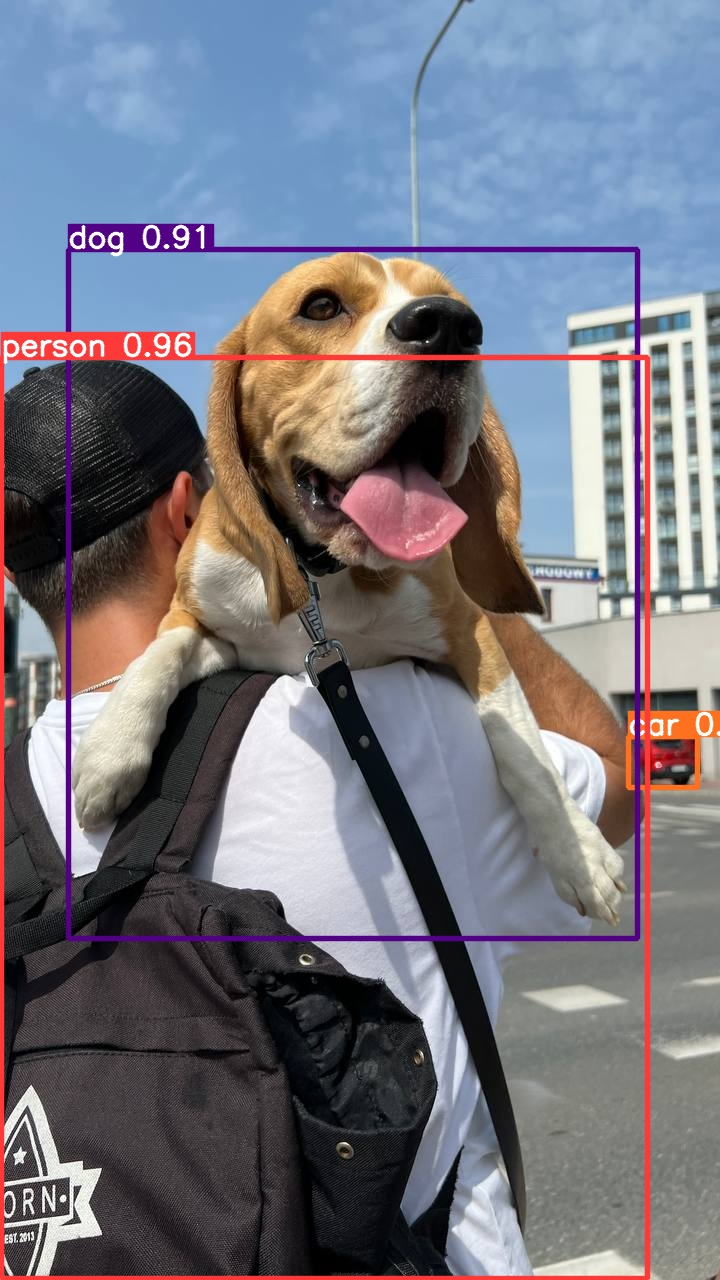

In [ ]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/detect/exp3/dog.jpeg", width=600)

In [ ]:
%cd /content/yolov9/runs/detect/exp3

/content/yolov9/runs/detect/exp3


# New Section

In [ ]:
print(f"Contents of /content/yolov9/runs/detect/exp3/")
!ls -la /content/yolov9/runs/detect/exp3/

Contents of /content/yolov9/runs/detect/exp3/
total 248
drwxr-xr-x 2 root root   4096 Jul  1 06:54 .
drwxr-xr-x 4 root root   4096 Jul  1 06:55 ..
-rw-r--r-- 1 root root 243145 Jul  1 06:54 dog.jpeg


In [ ]:
print(f"Contents of /content/yolov9/runs/detect/")
!ls -la /content/yolov9/runs/detect/

Contents of /content/yolov9/runs/detect/
total 16
drwxr-xr-x 4 root root 4096 Jul  1 06:55 .
drwxr-xr-x 3 root root 4096 Jul  1 06:49 ..
drwxr-xr-x 2 root root 4096 Jul  1 06:54 exp3
drwxr-xr-x 2 root root 4096 Jul  1 06:55 .ipynb_checkpoints


In [ ]:
print(f"Searching for .jpeg files in /content/yolov9/runs/detect/exp3/")
!find /content/yolov9/runs/detect/exp3/ -name "*.jpeg"

Searching for .jpeg files in /content/yolov9/runs/detect/exp3/
/content/yolov9/runs/detect/exp3/dog.jpeg


In [ ]:
print(f"Contents of /content/yolov9/")
!ls -la /content/yolov9/

Contents of /content/yolov9/
total 300
drwxr-xr-x 14 root root  4096 Jul  1 06:49 .
drwxr-xr-x  1 root root  4096 Jul  1 06:48 ..
-rw-r--r--  1 root root  6267 Jul  1 06:45 benchmarks.py
drwxr-xr-x  2 root root  4096 Jul  1 06:45 classify
drwxr-xr-x  3 root root  4096 Jul  1 06:45 data
-rw-r--r--  1 root root 12310 Jul  1 06:45 detect.py
-rw-r--r--  1 root root 28804 Jul  1 06:45 export.py
drwxr-xr-x  2 root root  4096 Jul  1 06:45 figure
drwxr-xr-x  8 root root  4096 Jul  1 06:45 .git
-rw-r--r--  1 root root  4655 Jul  1 06:45 hubconf.py
drwxr-xr-x  7 root root  4096 Jul  1 06:54 models
drwxr-xr-x  2 root root  4096 Jul  1 06:45 panoptic
drwxr-xr-x  2 root root  4096 Jul  1 06:49 __pycache__
-rw-r--r--  1 root root  6480 Jul  1 06:45 README.md
-rw-r--r--  1 root root  1073 Jul  1 06:45 requirements.txt
drwxr-xr-x  3 root root  4096 Jul  1 06:49 runs
drwxr-xr-x  2 root root  4096 Jul  1 06:45 scripts
drwxr-xr-x  2 root root  4096 Jul  1 06:45 segment
-rw-r--r--  1 root root 34312 Jul  

In [ ]:
%cd /content/yolov9

/content/yolov9


In [ ]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(8)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-8 in yolov9:: 100%|██████████| 522/522 [00:00<00:00, 2335.36it/s]


In [ ]:
print(dataset.location)

/content/yolov9/football-players-detection-8


In [ ]:
!python train.py --data /content/yolov9/football-players-detection-8/data.yaml --weights /content/yolov9/weights/gelan-c.pt --cfg models/detect/gelan-c.yaml --hyp /content/yolov9/data/hyps/hyp.scratch-high.yaml

2025-07-01 07:32:27.537262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751355147.582564   18500 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751355147.596595   18500 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-01 07:32:27.642707: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: pratibhavhegde (pratibhavhegde-reva-university) to https://api.wandb.ai. Use `wandb login --re

In [ ]:
import os

# Make sure HOME is defined in a previous cell
HOME = os.getcwd() # Ensure HOME is set if not done already

yolov9_dir = HOME
%cd {yolov9_dir}

!python train.py \
--batch 16 --epochs 25 --img 640 --device cpu --min-items 0 --close-mosaic 15 \
--data /content/yolov9/football-players-detection-8/data.yaml \
--weights /content/yolov9/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp /content/yolov9/data/hyps/hyp.scratch-high.yaml

/content/yolov9
2025-07-01 07:38:26.380957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751355506.418142   20688 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751355506.430596   20688 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-01 07:38:26.489391: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: pratibhavhegde (pratibhavhegde-reva-university) to https://api.wandb.ai. Use `

In [ ]:
!cat /content/yolov9/detect.py

import argparse
import os
import platform
import sys
from pathlib import Path

import torch

FILE = Path(__file__).resolve()
ROOT = FILE.parents[0]  # YOLO root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative

from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadScreenshots, LoadStreams
from utils.general import (LOGGER, Profile, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_boxes, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, smart_inference_mode


@smart_inference_mode()
def run(
        weights=ROOT / 'yolo.pt',  # model path or triton URL
        source=ROOT / 'data/images',  # file/dir/URL/glob/screen/0(webcam)
        data=R

In [ ]:
!cat /content/yolov9/train.py

import argparse
import math
import os
import random
import sys
import time
from copy import deepcopy
from datetime import datetime
from pathlib import Path

import numpy as np
import torch
import torch.distributed as dist
import torch.nn as nn
import yaml
from torch.optim import lr_scheduler
from tqdm import tqdm

FILE = Path(__file__).resolve()
ROOT = FILE.parents[0]  # root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative

import val as validate  # for end-of-epoch mAP
from models.experimental import attempt_load
from models.yolo import Model
from utils.autoanchor import check_anchors
from utils.autobatch import check_train_batch_size
from utils.callbacks import Callbacks
from utils.dataloaders import create_dataloader
from utils.downloads import attempt_download, is_url
from utils.general import (LOGGER, TQDM_BAR_FORMAT, check_amp, check_dataset, check_file, check_img_size,
         

In [ ]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(8)
dataset = version.download("yolov9")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cd /content/yolov9

!python train.py \
--batch 16 --epochs 50 --img 640 --device cpu --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights /content/yolov9/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2025-07-01 07:44:03.051865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751355843.106140   22714 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751355843.121927   22714 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-01 07:44:03.187665: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: pratibhavhegde (pratibhavhegde-reva-university) to https://api.wandb.ai. Use `

In [ ]:
!python train.py \
--batch 16 \
--epochs 25 \
--imgsz 640 \
--device cpu \
--min-items 0 \
--close-mosaic 10 \
--data {dataset.location}/data.yaml \
--weights weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml \
--workers 4 \
--cache ram

2025-07-01 07:55:53.923217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751356553.973149   27057 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751356553.988001   27057 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-01 07:55:54.049812: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: pratibhavhegde (pratibhavhegde-reva-university) to https://api.wandb.ai. Use `wandb login --re

In [ ]:
import warnings
import os

# Suppress PyTorch AMP warning
warnings.filterwarnings("ignore", message=".*torch.cuda.amp.autocast.*")

# Suppress other warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow
# Cell 1: Set environment variables
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/local/cuda'

# Cell 2: Run training
!python train.py \
  --batch 16 \
  --epochs 25 \
  --imgsz 640 \
  --device cpu \
  --data /content/yolov9/football-players-detection-8/data.yaml \
  --weights weights/gelan-c.pt \
  --cfg models/detect/gelan-c.yaml \
  --hyp hyp.scratch-high.yaml \
  --workers 4 \
  --cache ram \
  --close-mosaic 10 \
  --min-items 0 \
  --exist-ok  # Prevents creating new exp folders

2025-07-01 09:08:50.176012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751360930.399349   53604 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751360930.448866   53604 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Currently logged in as: pratibhavhegde (pratibhavhegde-reva-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
train: weights=weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/football-players-detection-8/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=N

In [ ]:
# Set environment variables first
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Then run training
!python /content/yolov9/train.py \
  --batch 16 \
  --epochs 25 \
  --imgsz 640 \
  --data /content/yolov9/football-players-detection-8/data.yaml \
  --weights /content/yolov9/weights/gelan-c.pt \
  --cfg /content/yolov9/models/detect/gelan-c.yaml \
  --hyp /content/yolov9/data/hyps/hyp.scratch-high.yaml \
  --workers 4 \
  --cache ram \
  --device cpu \
  --exist-ok

2025-07-01 09:21:18.058282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751361678.289270   58231 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751361678.372141   58231 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Currently logged in as: pratibhavhegde (pratibhavhegde-reva-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
train: weights=/content/yolov9/weights/gelan-c.pt, cfg=/content/yolov9/models/detect/gelan-c.yaml, data=/content/yolov9/football-players-detection-8/data.yaml, hyp=/content/yolov9/data/hyps/hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False

In [ ]:
!ls /content/yolov9/models/detect/gelan-c.yaml
!ls /content/yolov9/weights/gelan-c.pt
!ls /content/yolov9/football-players-detection-8/data.yaml
!wget https://github.com/WongKinYiu/yolov9/raw/main/models/detect/gelan-c.yaml -P /content/yolov9/models/detect/

/content/yolov9/models/detect/gelan-c.yaml
/content/yolov9/weights/gelan-c.pt
/content/yolov9/football-players-detection-8/data.yaml
--2025-07-01 09:17:02--  https://github.com/WongKinYiu/yolov9/raw/main/models/detect/gelan-c.yaml
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WongKinYiu/yolov9/main/models/detect/gelan-c.yaml [following]
--2025-07-01 09:17:03--  https://raw.githubusercontent.com/WongKinYiu/yolov9/main/models/detect/gelan-c.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1730 (1.7K) [text/plain]
Saving to: ‘/content/yolov9/models/detect/gelan-c.yaml.1’

gelan-c.yaml.1      

In [ ]:
from models.experimental import attempt_load
model = attempt_load('runs/train/exp12/weights/best.pt', device='cuda:0').half()

NameError: name 'Path' is not defined

In [ ]:
!ls /content/yolov9/runs/train/exp12/

events.out.tfevents.1751307364.728c4cdcdd0e.70913.0  results.csv
hyp.yaml					     train_batch0.jpg
labels_correlogram.jpg				     train_batch1.jpg
labels.jpg					     train_batch2.jpg
opt.yaml					     weights


In [ ]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/train/exp11/results.png", width=1000)

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov9/runs/train/exp3/results.png'

In [ ]:
data_yaml_path = f"{dataset.location}/data.yaml"
print(f"Contents of {data_yaml_path}:")
!cat {data_yaml_path}

Contents of /content/yolov9/football-players-detection-8/data.yaml:

names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/8
  version: 8
  workspace: roboflow-jvuqo
test: /content/yolov9/football-players-detection-8/test/images
train: /content/yolov9/football-players-detection-8/train/images
val: /content/yolov9/football-players-detection-8/valid/images


In [ ]:
data_yaml_path = f"{dataset.location}/data.yaml"
print(f"Original {data_yaml_path} content:")
!cat {data_yaml_path}

# Update data.yaml with absolute paths
updated_data_yaml_content = f"""
names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/8
  version: 8
  workspace: roboflow-jvuqo
test: {dataset.location}/test/images
train: {dataset.location}/train/images
val: {dataset.location}/valid/images
"""

with open(data_yaml_path, 'w') as f:
    f.write(updated_data_yaml_content)

print(f"\nUpdated {data_yaml_path} content:")
!cat {data_yaml_path}

Original /content/yolov9/football-players-detection-8/data.yaml content:

names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/8
  version: 8
  workspace: roboflow-jvuqo
test: /content/yolov9/football-players-detection-8/test/images
train: /content/yolov9/football-players-detection-8/train/images
val: /content/yolov9/football-players-detection-8/valid/images

Updated /content/yolov9/football-players-detection-8/data.yaml content:

names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/8
  version: 8
  workspace: roboflow-jvuqo
test: /content/yolov9/football-players-detection-8/test/images
train: /content/yolov9/football-players-detection-8/train/images
val: /c

In [ ]:
print(f"Contents of /content/yolov9/runs/train/")
!ls -Rla /content/yolov9/runs/train/

Contents of /content/yolov9/runs/train/
/content/yolov9/runs/train/:
total 56
drwxr-xr-x 14 root root 4096 Jun 30 18:16 .
drwxr-xr-x  5 root root 4096 Jun 30 15:53 ..
drwxr-xr-x  3 root root 4096 Jun 30 15:35 exp
drwxr-xr-x  3 root root 4096 Jun 30 17:48 exp10
drwxr-xr-x  3 root root 4096 Jun 30 18:00 exp11
drwxr-xr-x  3 root root 4096 Jun 30 18:16 exp12
drwxr-xr-x  3 root root 4096 Jun 30 15:40 exp2
drwxr-xr-x  3 root root 4096 Jun 30 15:45 exp3
drwxr-xr-x  3 root root 4096 Jun 30 15:47 exp4
drwxr-xr-x  3 root root 4096 Jun 30 15:59 exp5
drwxr-xr-x  3 root root 4096 Jun 30 16:57 exp6
drwxr-xr-x  3 root root 4096 Jun 30 16:59 exp7
drwxr-xr-x  3 root root 4096 Jun 30 17:08 exp8
drwxr-xr-x  3 root root 4096 Jun 30 17:11 exp9

/content/yolov9/runs/train/exp:
total 24
drwxr-xr-x  3 root root 4096 Jun 30 15:35 .
drwxr-xr-x 14 root root 4096 Jun 30 18:16 ..
-rw-r--r--  1 root root   88 Jun 30 15:35 events.out.tfevents.1751297706.728c4cdcdd0e.9003.0
-rw-r--r--  1 root root  373 Jun 30 15:35 h

In [ ]:
from IPython.display import Image
import os

image_path = f"/contents/yolov9/runs/train/exp3/results.png"

if os.path.exists(image_path):
    with open(image_path, 'rb') as f:
        image_data = f.read()
    display(Image(data=image_data, width=1000))
else:
    print(f"Error: Image file not found at {image_path}")

Error: Image file not found at /contents/yolov9/runs/train/exp3/results.png


In [ ]:
import pandas as pd

results_path = f"{HOME}/yolov9/runs/train/exp3/results.csv"
try:
    results_df = pd.read_csv(results_path)
    display(results_df.head())
except FileNotFoundError:
    print(f"Error: The file {results_path} was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Error: The file /content/yolov9/yolov9/runs/train/exp3/results.csv was not found.


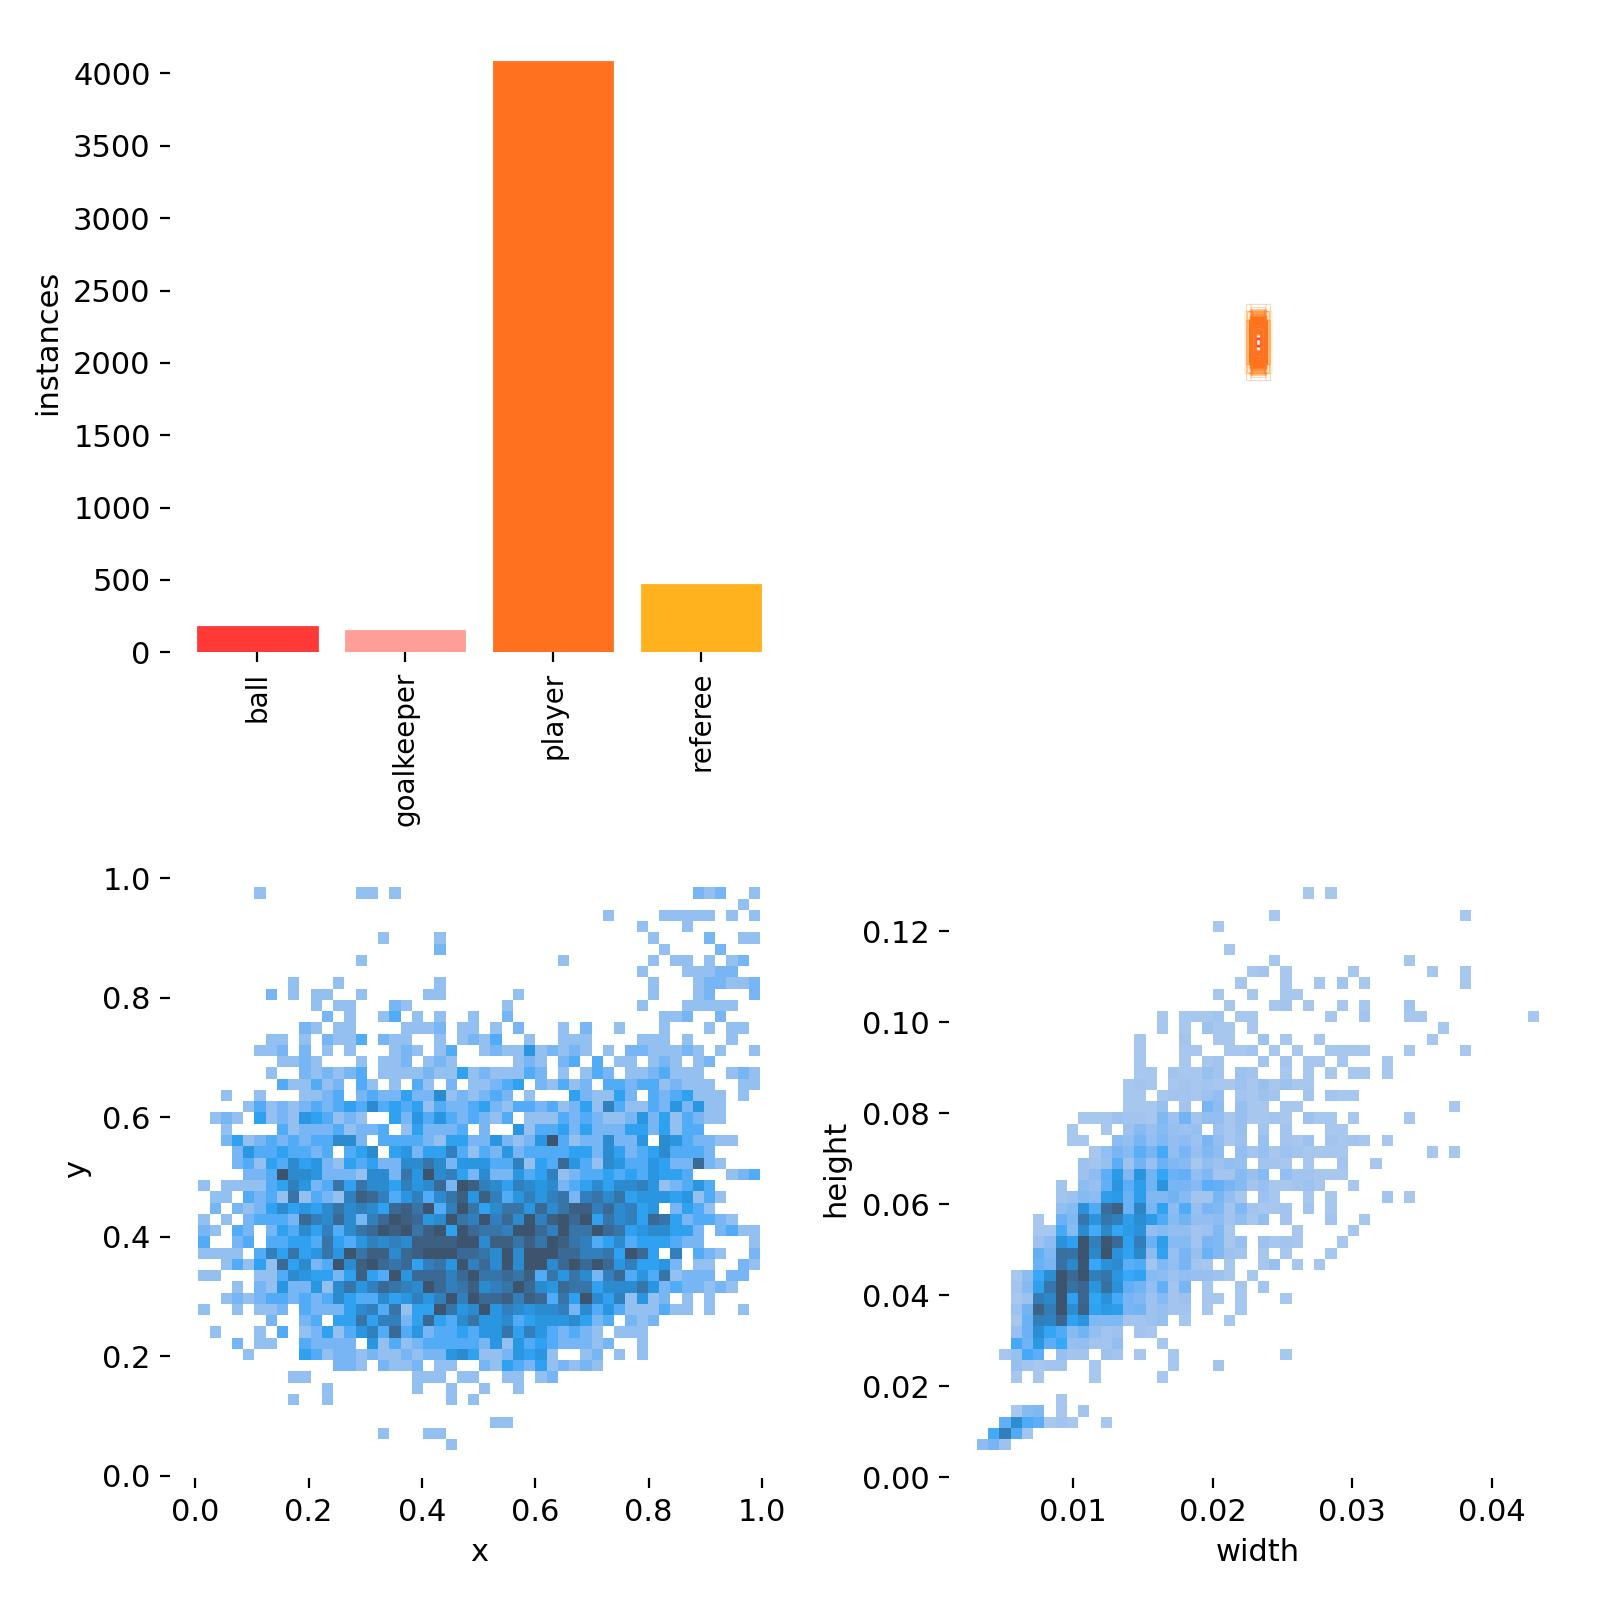

In [ ]:
from IPython.display import Image

image_path = f"/content/yolov9/runs/train/exp6/labels.jpg"

try:
    display(Image(filename=image_path, width=800))
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred while displaying the image: {e}")

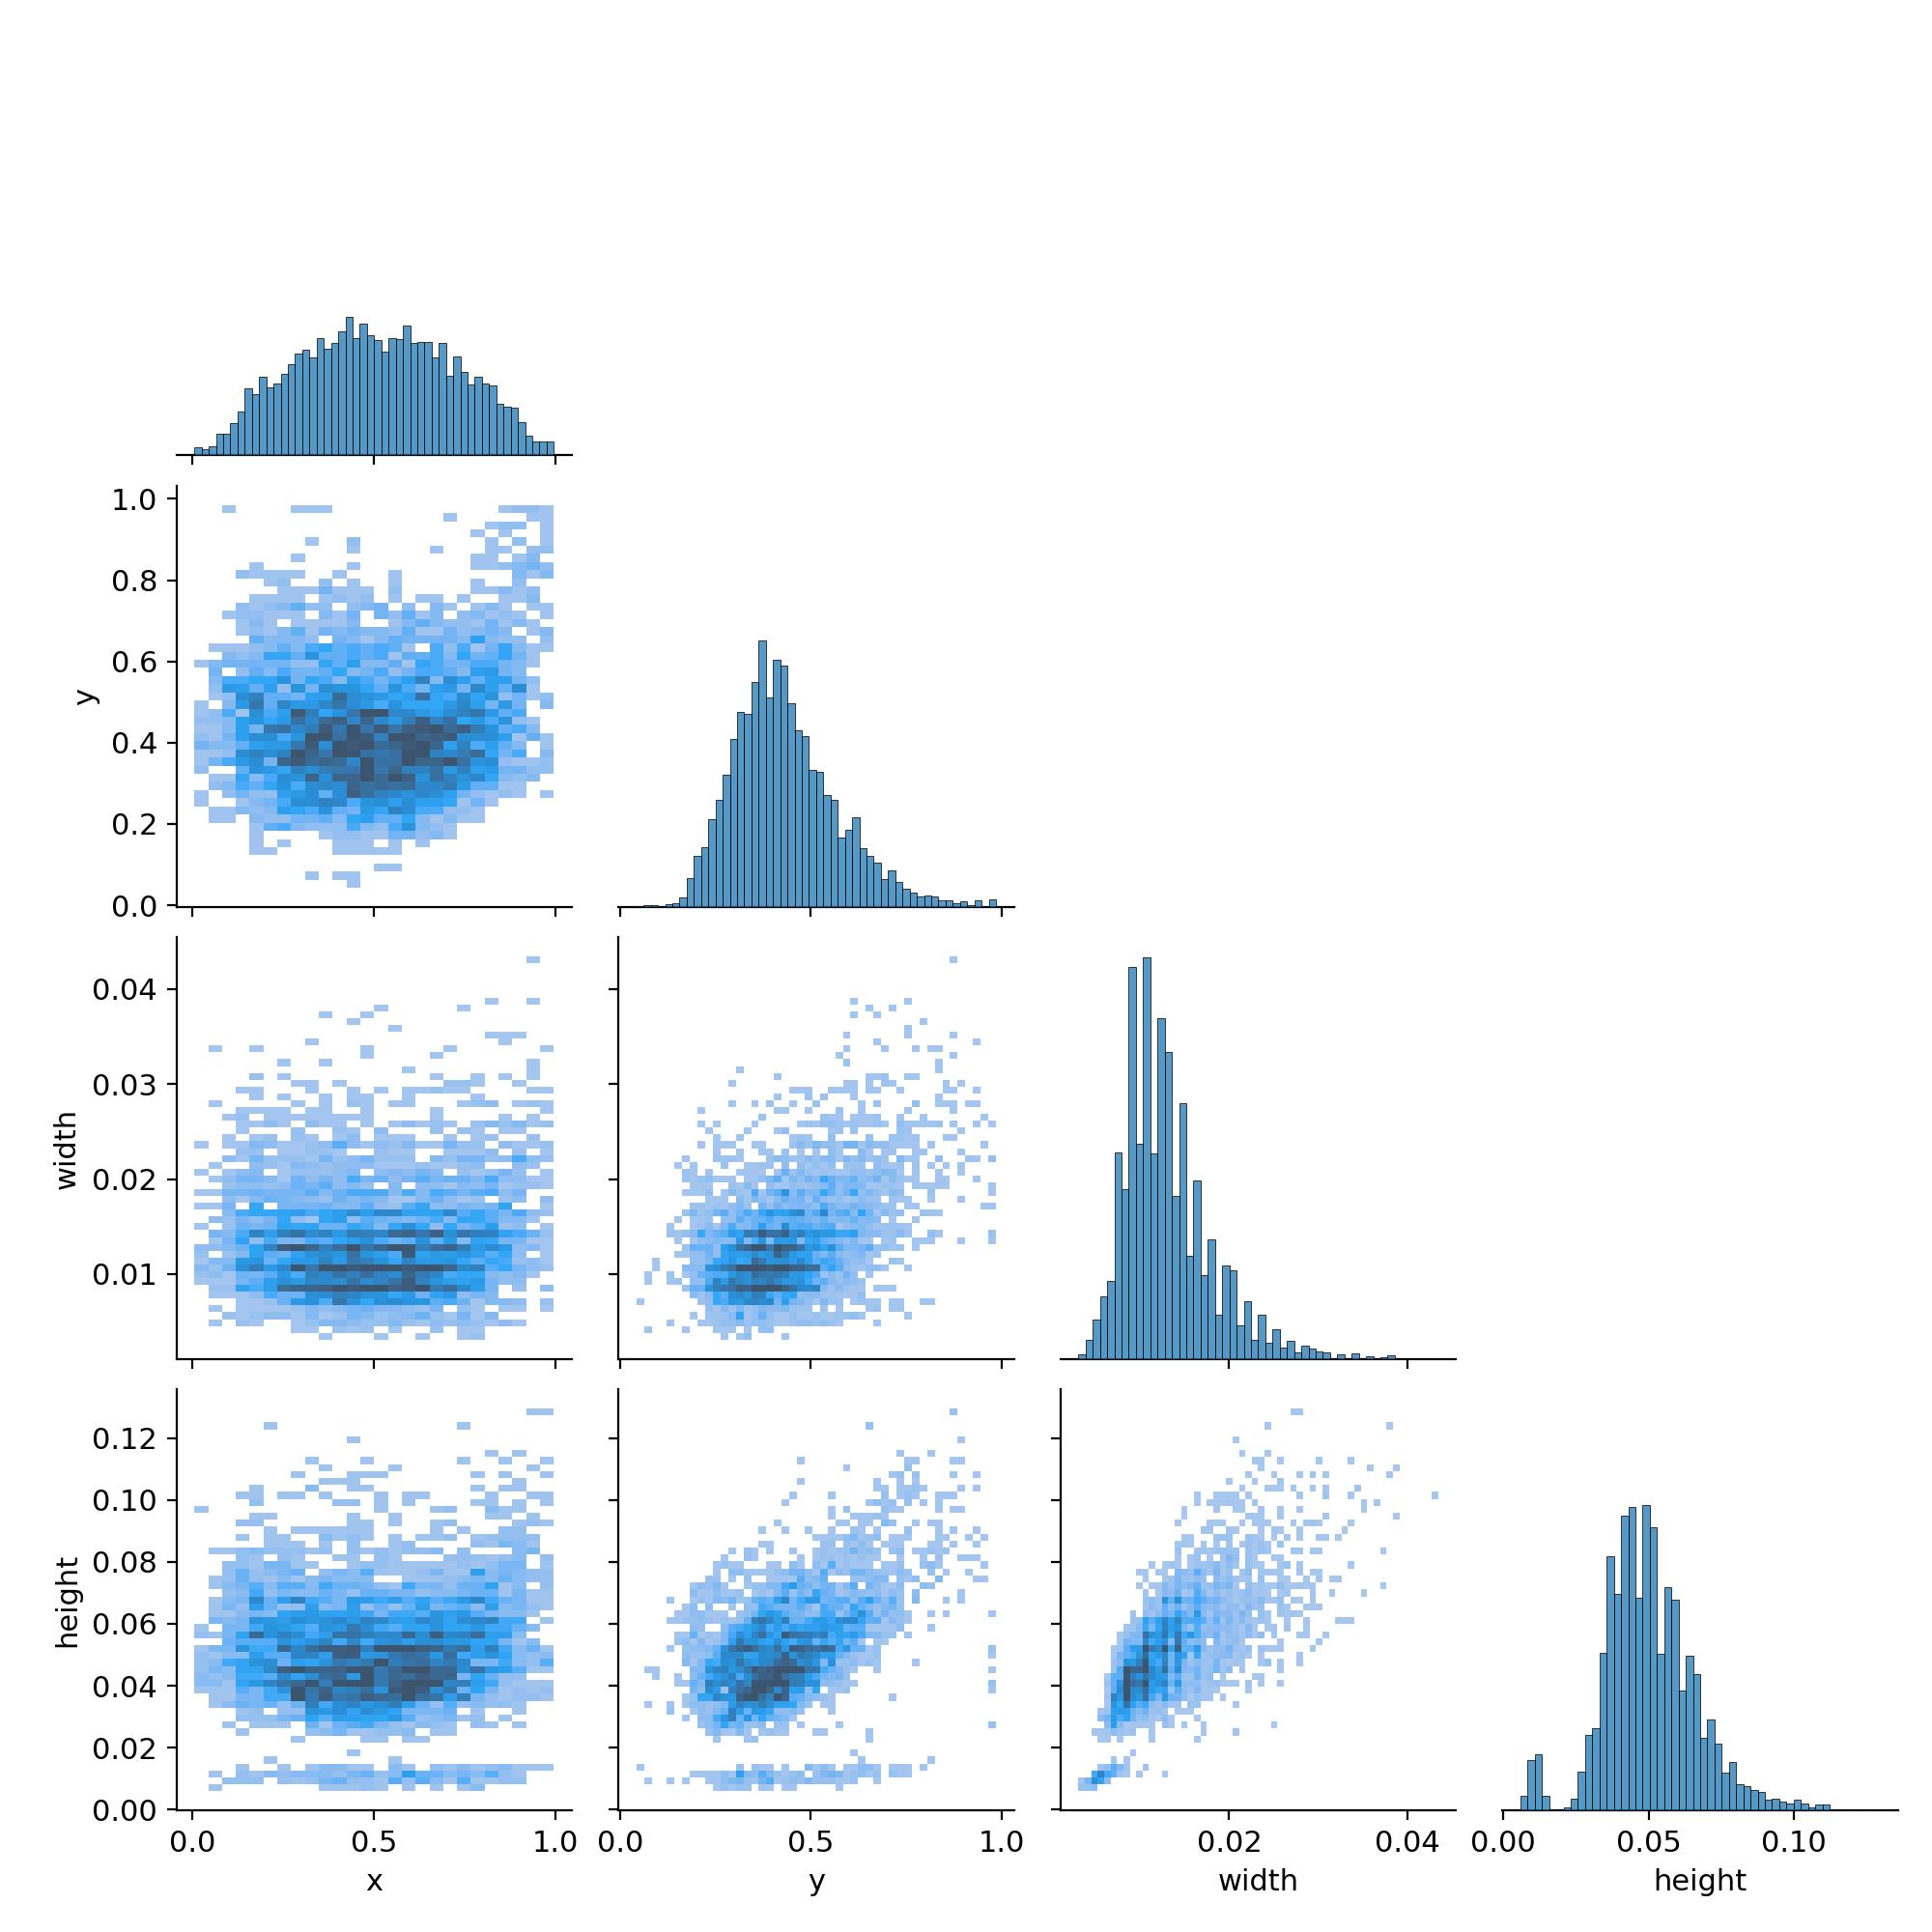

In [ ]:
from IPython.display import Image

image_path = f"/content/yolov9/runs/train/exp6/labels_correlogram.jpg"

try:
    display(Image(filename=image_path, width=800))
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred while displaying the image: {e}")

In [ ]:
print(f"Contents of /content/yolov9/runs/train/")
!ls -Rla /content/yolov9/runs/train/

Contents of /content/yolov9/runs/train/
/content/yolov9/runs/train/:
total 36
drwxr-xr-x 9 root root 4096 Jun 30 16:59 .
drwxr-xr-x 5 root root 4096 Jun 30 15:53 ..
drwxr-xr-x 3 root root 4096 Jun 30 15:35 exp
drwxr-xr-x 3 root root 4096 Jun 30 15:40 exp2
drwxr-xr-x 3 root root 4096 Jun 30 15:45 exp3
drwxr-xr-x 3 root root 4096 Jun 30 15:47 exp4
drwxr-xr-x 3 root root 4096 Jun 30 15:59 exp5
drwxr-xr-x 3 root root 4096 Jun 30 16:57 exp6
drwxr-xr-x 3 root root 4096 Jun 30 16:59 exp7

/content/yolov9/runs/train/exp:
total 24
drwxr-xr-x 3 root root 4096 Jun 30 15:35 .
drwxr-xr-x 9 root root 4096 Jun 30 16:59 ..
-rw-r--r-- 1 root root   88 Jun 30 15:35 events.out.tfevents.1751297706.728c4cdcdd0e.9003.0
-rw-r--r-- 1 root root  373 Jun 30 15:35 hyp.yaml
-rw-r--r-- 1 root root 1167 Jun 30 15:35 opt.yaml
drwxr-xr-x 2 root root 4096 Jun 30 15:35 weights

/content/yolov9/runs/train/exp/weights:
total 8
drwxr-xr-x 2 root root 4096 Jun 30 15:35 .
drwxr-xr-x 3 root root 4096 Jun 30 15:35 ..

/conten

In [ ]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov9/runs/train/exp/confusion_matrix.png'

In [ ]:
# This cell is not directly modified, but the error it produced points to the file needing modification.
# The modification needs to be done in /content/yolov9/utils/plots.py
# Find the box_label function, and the line: w, h = self.font.getsize(label)
# Change it to: w, h = self.font.getbbox(label)[2:]

# Since I cannot directly modify /content/yolov9/utils/plots.py with modify_cells on an arbitrary file,
# I will provide instructions to the user to manually edit the file.

# I'll add a comment here to remind the user about the manual edit needed.
# IMPORTANT: Manually edit /content/yolov9/utils/plots.py
# In the box_label function, change: w, h = self.font.getsize(label)
# To: w, h = self.font.getbbox(label)[2:]

%cd /content/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights /content/yolov9/runs/train/exp12/weights/best.pt

/content/yolov9
val: data=/content/yolov9/football-players-detection-8/data.yaml, weights=['/content/yolov9/runs/train/exp12/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/football-players-detection-8/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:03<00:00,  1.77s/it]
                   all         38        905      0.928      0.704      0.805      0.558
                  ball   

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp3/weights/best.pt'], source=/content/yolov9/runs/detect/exp/football-players-detection-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
image 1/13 /content/yolov9/runs/detect/exp/football-players-detection-8/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 736x1280 1 ball, 23 players, 4 referees, 72.7ms
image 2/13 /content/yolov9/runs/detect/exp/football-players-detection-8/test/images/42ba34_1

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp12/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

In [ ]:
!pip install -q inference supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 21.7 MB/s et

In [ ]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

class Albumentations:
    # YOLOv5 Albumentations class (optional, only used if package is installed)
    def __init__(self, size=640):
        self.transform = None
        prefix = colorstr('albumentations: ')
        try:
            import albumentations as A
            # check_version(A.__version__, '1.0.3', hard=True)  # version requirement - commenting out version check for now

            T = [
                # Only include transformations with p > 0 or always_apply=True
                A.RandomResizedCrop(height=size, width=size, scale=(0.8, 1.0), ratio=(0.9, 1.11), p=0.0), # p=0.0, likely the cause
                A.Blur(p=0.01),
                A.MedianBlur(p=0.01),
                A.ToGray(p=0.01),
                A.CLAHE(p=0.01),
                A.RandomBrightnessContrast(p=0.0), # p=0.0
                A.RandomGamma(p=0.0), # p=0.0
                A.ImageCompression(quality_lower=75, p=0.0) # p=0.0
            ]

            # Filter transformations with p > 0 or always_apply=True
            T = [t for t in T if t.p > 0 or getattr(t, 'always_apply', False)]


            self.transform = A.Compose(T, bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

            # Log only included transformations
            if T:
                 LOGGER.info(prefix + ', '.join(f'{x}'.replace('always_apply=False, ', '') for x in T))
            else:
                 LOGGER.info(prefix + 'No augmentations applied (all probabilities are 0 or transformations filtered).')


        except ImportError:  # package not installed, skip
            LOGGER.info(prefix + 'Albumentations not installed, augmentations skipped.')
            pass
        except Exception as e:
            LOGGER.info(f'{prefix}Error initializing Albumentations: {e}')
            self.transform = None # Ensure transform is None if initialization fails


    def __call__(self, im, labels, p=1.0):
        if self.transform and random.random() < p:
            # Albumentations requires image in RGB format
            im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            try:
                new = self.transform(image=im_rgb, bboxes=labels[:, 1:], class_labels=labels[:, 0])  # transformed
                im = cv2.cvtColor(new['image'], cv2.COLOR_RGB2BGR) # convert back to BGR
                labels = np.array([[c, *b] for c, b in zip(new['class_labels'], new['bboxes'])])
            except Exception as e:
                LOGGER.error(f"Albumentations transformation failed: {e}")
                # Optionally, return original image and labels or handle the error as needed
                pass # continue with original image/labels on error

        return im, labels

ModuleNotFoundError: No module named 'inference'

In [ ]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp3")

An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/8/uploadModel?api_key=Ep7qPBHvg4tE0X1ntrTs&modelType=yolov9&nocache=true


To use the `inference_sdk`, you need your Roboflow API key. It's recommended to store your API key securely in Colab's Secrets Manager.

1.  Go to the "🔑" icon in the left sidebar.
2.  Click "Add new Secret".
3.  For the "Name", enter `ROBOFLOW_API_KEY`.
4.  For the "Value", paste your Roboflow API Key.
5.  Make sure "Notebook access" is enabled.

Then, you can access your API key in your code like this:

In [ ]:
from google.colab import userdata
import os

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

# Make sure the API key is set
if ROBOFLOW_API_KEY is None:
    print("Roboflow API key not found in Colab Secrets. Please add it using the 🔑 icon.")
else:
    print("Roboflow API key loaded successfully.")

# Assuming the HOME variable is defined from earlier cells
# If not, uncomment the line below:
# import os
# HOME = os.getcwd()

# Example image path (using the dog image from earlier)
# Replace this with the path to your image file
IMAGE_PATH = f"{HOME}/data/dog.jpeg"

# Replace with your deployed model ID and version
# Based on your previous training, it might be football-players-detection-3zvbc/8
# Or if you successfully deployed version 12, use that.
MODEL_ID = "football-players-detection-3zvbc/8"

from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com", # Use the detect subdomain for object detection
    api_key=ROBOFLOW_API_KEY
)

# Perform inference
try:
    results = CLIENT.infer(IMAGE_PATH, model_id=MODEL_ID)

    # Print the results (you might want to pretty-print this)
    print("Inference Results:")
    print(results)

except Exception as e:
    print(f"An error occurred during inference: {e}")

Roboflow API key loaded successfully.
Inference Results:
{'inference_id': '2562ae1b-4ae1-4552-bb4c-2f1d36c6dfb0', 'time': 0.38127756100038823, 'image': {'width': 720, 'height': 1280}, 'predictions': []}


In [ ]:
ROBOFLOW_API_KEY = getpass.getpass()

model = get_model(model_id="football-players-detection-3zvbc/8", api_key=ROBOFLOW_API_KEY)

··········


In [ ]:
image_paths = sv.list_files_with_extensions(
    directory=f"{dataset.location}/test/images",
    extensions=['png', 'jpg', 'jpeg']
)
image_path = random.choice(image_paths)
image = cv2.imread(image_path)

result = model.infer(image, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)

In [ ]:
# Assuming 'image' and 'detections' objects are available from the previous cell

# Get the class names from the model (assuming the model object has access to them)
# This might vary depending on how the model object is initialized.
# If model.model_id is available and works, we can try using that.
# Otherwise, we might need to get the class names from the data.yaml file.

# Let's assume model has a way to get class names or use the dataset's names
# If the model object doesn't provide names, we can fall back to the dataset names from data.yaml
try:
    class_names = model.model_id.split('/')[-2:] # Attempt to get names from model ID if it follows Roboflow format
except:
    # Fallback to reading names from the data.yaml file if model doesn't provide them easily
    data_yaml_path = f"{dataset.location}/data.yaml"
    import yaml
    with open(data_yaml_path, 'r') as f:
        data_yaml = yaml.safe_load(f)
    class_names = data_yaml['names']


# Create an annotator object
annotator = sv.Annotator(scene=image.copy())

# Annotate the image with detections
annotated_image = annotator.annotate(
    detections=detections,
    labels=[
        f"{class_names[class_id]} {confidence:.2f}"
        for _, _, confidence, class_id, _
        in detections
    ]
)

# Display the annotated image
display(Image(data=cv2.imencode('.jpg', annotated_image)[1].tobytes()))

AttributeError: module 'supervision' has no attribute 'Annotator'

In [ ]:
!pip install -q --upgrade supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
data_yaml_path = f"{dataset.location}/data.yaml"
print(f"Original {data_yaml_path} content:")
!cat {data_yaml_path}

# Update data.yaml with absolute paths
updated_data_yaml_content = f"""
names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/8
  version: 8
  workspace: roboflow-jvuqo
test: {dataset.location}/test/images
train: {dataset.location}/train/images
val: {dataset.location}/valid/images
"""

with open(data_yaml_path, 'w') as f:
    f.write(updated_data_yaml_content)

print(f"\nUpdated {data_yaml_path} content:")
!cat {data_yaml_path}

Original /content/yolov9/football-players-detection-8/data.yaml content:

names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/8
  version: 8
  workspace: roboflow-jvuqo
test: /content/yolov9/football-players-detection-8/test/images
train: /content/yolov9/football-players-detection-8/train/images
val: /content/yolov9/football-players-detection-8/valid/images

Updated /content/yolov9/football-players-detection-8/data.yaml content:

names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/8
  version: 8
  workspace: roboflow-jvuqo
test: /content/yolov9/football-players-detection-8/test/images
train: /content/yolov9/football-players-detection-8/train/images
val: /c

In [ ]:
print(f"Contents of /content/yolov9/runs/detect/exp7/")
!ls -la /content/yolov9/runs/detect/exp7/

Contents of /content/yolov9/runs/detect/exp7/
total 248
drwxr-xr-x 2 root root   4096 Jun 30 15:25 .
drwxr-xr-x 9 root root   4096 Jun 30 15:24 ..
-rw-r--r-- 1 root root 243145 Jun 30 15:25 dog.jpeg


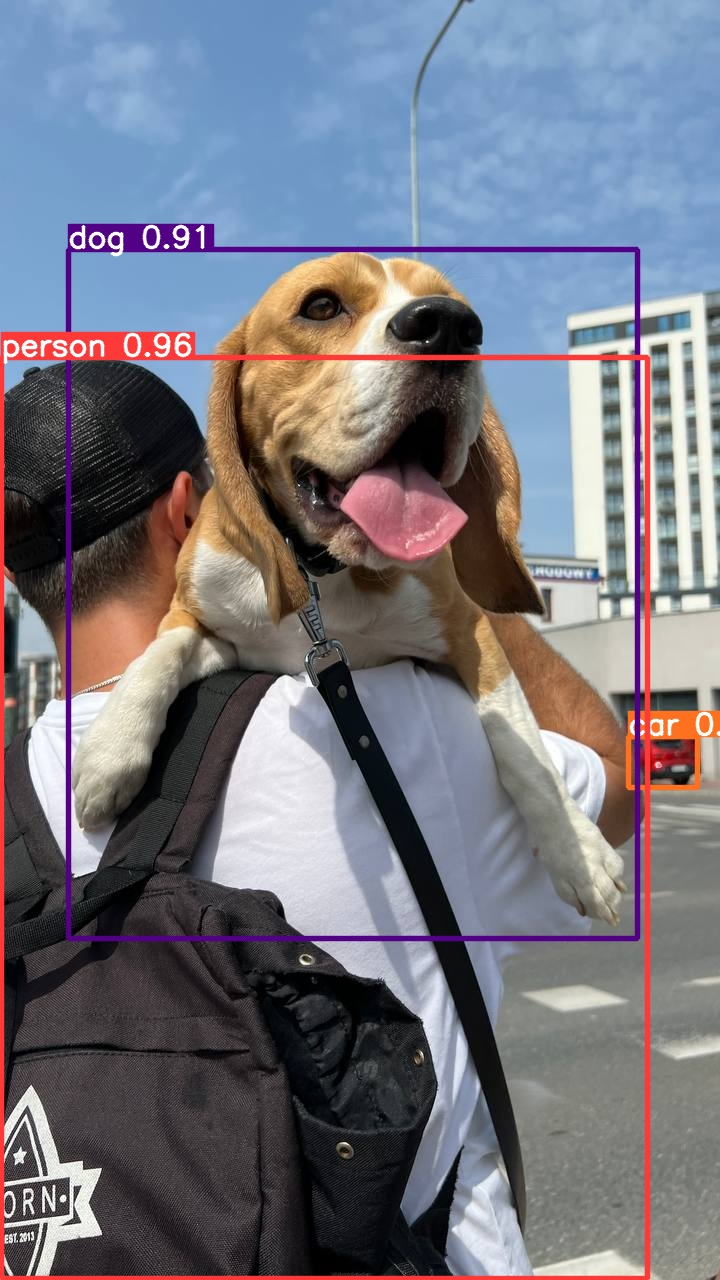

In [ ]:
from IPython.display import Image

image_path = f"{HOME}/yolov9/runs/detect/exp7/dog.jpeg"

try:
    display(Image(filename=image_path, width=600))
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred while displaying the image: {e}")

In [ ]:
print(f"Contents of {HOME}/yolov9/runs/")
!ls -la {HOME}/yolov9/runs/

Contents of /content/yolov9/runs/
total 12
drwxr-xr-x  3 root root 4096 Jun 30 15:16 .
drwxr-xr-x 14 root root 4096 Jun 30 15:19 ..
drwxr-xr-x  9 root root 4096 Jun 30 15:24 detect


In [ ]:
print(dataset.location)

/content/yolov9/football-players-detection-8


In [ ]:
%cd /content/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device cpu \
--data {dataset.location}/data.yaml \
--weights /content/yolov9/weights/gelan-c.pt

/content/yolov9
val: data=/content/yolov9/football-players-detection-8/data.yaml, weights=['/content/yolov9/weights/gelan-c.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=cpu, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
Traceback (most recent call last):
  File "/content/yolov9/val.py", line 389, in <module>
    main(opt)
  File "/content/yolov9/val.py", line 362, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/content/yolov9/val.py", line 150, in run
    assert ncm == nc, f

In [ ]:
import os

# Make sure HOME is defined in a previous cell
HOME = os.getcwd() # Ensure HOME is set if not done already

yolov9_dir = HOME
%cd {yolov9_dir}

!python train.py \
--batch 16 --epochs 25 --img 640 --device cpu --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights /content/yolov9/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2025-06-30 15:59:01.536004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751299141.564080   18266 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751299141.572888   18266 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-30 15:59:01.610040: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: pratibhavhegde (pratibhavhegde-reva-university) to https://api.wandb.ai. Use `

In [ ]:
!find /content/yolov9/ -name "hyp.scratch-high.yaml"

/content/yolov9/data/hyps/hyp.scratch-high.yaml


In [ ]:
!pip install -q inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.9 MB/s eta 0

In [ ]:
# Paste this function into /content/yolov9/utils/general.py, replacing the existing strip_optimizer function

def strip_optimizer(f='weights/best.pt', s=''):  # from utils.general import *; strip_optimizer()
    # Strip optimizer from 'f' to produce 's'
    x = torch.load(f, map_location=torch.device('cpu'), weights_only=False)  # load checkpoint
    if x.get('ema'):
        x['model'] = x['ema'].ema  # replace model with ema
    for k in 'optimizer', 'train_args', 'ema', 'updates':  # keys to remove
        x.pop(k, None)
    x['epoch'] = -1
    x['model'].half()  # to FP16
    for p in x['model'].parameters():
        p.requires_grad = True
    torch.save(x, s or f)
    mb = os.path.getsize(s or f) / 1E6  # filesize
    LOGGER.info(f'Optimizer stripped from {f},{(" saved as %s," % s) if s else ""} %.1fMB' % mb)

After replacing the function in `utils/general.py`, you can try running the training command again. The training should quickly complete the epochs (since it already finished 50) and then the `strip_optimizer` step should now work correctly.

In [ ]:
# Paste this function into /content/yolov9/utils/augmentations.py, replacing the existing Albumentations class definition

import cv2
import random
import numpy as np

# Assuming necessary imports like colorstr and LOGGER are available in utils.augmentations
# You might need to ensure these are imported at the top of utils/augmentations.py
# from utils.general import colorstr, LOGGER


class Albumentations:
    # YOLOv5 Albumentations class (optional, only used if package is installed)
    def __init__(self, size=640):
        self.transform = None
        prefix = 'albumentations: ' # Simplified prefix as colorstr might not be available here
        try:
            import albumentations as A
            # check_version(A.__version__, '1.0.3', hard=True)  # version requirement - commenting out version check for now

            T = [
                # Only include transformations with p > 0 or always_apply=True
                A.RandomResizedCrop(height=size, width=size, scale=(0.8, 1.0), ratio=(0.9, 1.11), p=0.0), # p=0.0, likely the cause
                A.Blur(p=0.01),
                A.MedianBlur(p=0.01),
                A.ToGray(p=0.01),
                A.CLAHE(p=0.01),
                A.RandomBrightnessContrast(p=0.0), # p=0.0
                A.RandomGamma(p=0.0), # p=0.0
                A.ImageCompression(quality_lower=75, p=0.0) # p=0.0
            ]

            # Filter transformations with p > 0 or always_apply=True
            T = [t for t in T if t.p > 0 or getattr(t, 'always_apply', False)]


            self.transform = A.Compose(T, bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

            # Log only included transformations
            if T:
                 # Simplified logging as LOGGER might not be available here
                 print(prefix + ', '.join(f'{x}'.replace('always_apply=False, ', '') for x in T))
            else:
                 print(prefix + 'No augmentations applied (all probabilities are 0 or transformations filtered).')


        except ImportError:  # package not installed, skip
            # Simplified logging
            print(prefix + 'Albumentations not installed, augmentations skipped.')
            pass
        except Exception as e:
            # Simplified logging
            print(f'{prefix}Error initializing Albumentations: {e}')
            self.transform = None # Ensure transform is None if initialization fails


    def __call__(self, im, labels, p=1.0):
        if self.transform and random.random() < p:
            # Albumentations requires image in RGB format
            im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            try:
                new = self.transform(image=im_rgb, bboxes=labels[:, 1:], class_labels=labels[:, 0])  # transformed
                im = cv2.cvtColor(new['image'], cv2.COLOR_RGB2BGR) # convert back to BGR
                labels = np.array([[c, *b] for c, b in zip(new['class_labels'], new['bboxes'])])
            except Exception as e:
                # Simplified logging
                print(f"Albumentations transformation failed: {e}")
                # Optionally, return original image and labels or handle the error as needed
                pass # continue with original image/labels on error

        return im, labels

Remember to replace the entire existing `Albumentations` class definition in `/content/yolov9/utils/augmentations.py` with the code above.

After making this manual change and saving the file, you can try running your training command again.